# Analysis of company size change in popular industry fields

## Data Wrangling

In [211]:
import pandas as pd
import numpy as np
# visualization
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import Timestamp
import matplotlib as mpl
# machine learning
from sklearn.model_selection import train_test_split
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
# Yahoo finance
import yfinance as yf

import datetime
import time
import requests
import io

In [5]:
mpl.rc('font', family='serif')

In [179]:
df = pd.read_csv('temp_datalab_records_linkedin_company.csv', low_memory=False)
df

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
0,58329,2015-09-14,Goldman Sachs,552254,38124,https://www.linkedin.com/company/1382,Investment Banking,2015-09-14 00:00:00+00,2015-09-14 00:00:00+00,NaN,NaN,NaN,NaN,NaN
1,58329,2015-09-15,Goldman Sachs,552862,38141,https://www.linkedin.com/company/1382,Investment Banking,2015-09-15 00:00:00+00,2015-09-15 00:00:00+00,NaN,NaN,NaN,NaN,NaN
2,58363,2015-09-16,United Technologies,59157,14982,https://www.linkedin.com/company/2426,Aviation & Aerospace,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
3,58366,2015-09-16,Novo Nordisk,336175,26448,https://www.linkedin.com/company/2227,Pharmaceuticals,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
4,58371,2015-09-16,"Lowe's Companies, Inc.",134255,62574,https://www.linkedin.com/company/4128,Retail,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426191,902985,2018-07-17,"Diversified Restaurant Holdings, Inc (Nasdaq: ...",488,89,https://www.linkedin.com/company/428083,Restaurants,2018-07-17 17:17:08.8897+00,2018-07-17 17:17:08.889725+00,NaN,http://www.diversifiedrestaurantholdings.com,NaN,NaN,NaN
2426192,903052,2018-07-17,First Financial Northwest Bank,785,118,https://www.linkedin.com/company/497673,Banking,2018-07-17 15:54:35.807059+00,2018-07-17 15:54:35.807085+00,NaN,http://www.ffnwb.com,NaN,NaN,NaN
2426193,902948,2018-07-17,DMC Global Inc.,1521,184,https://www.linkedin.com/company/586890,Oil & Energy,2018-07-17 13:44:19.302482+00,2018-07-17 13:44:19.302508+00,NaN,http://www.dmcglobal.com,NaN,NaN,NaN
2426194,910210,2018-07-17,ServiceSource,27963,2496,https://www.linkedin.com/company/11889,Information Technology and Services,2018-07-17 17:28:48.430667+00,2018-07-17 17:28:48.430717+00,NaN,http://www.servicesource.com,NaN,NaN,NaN


In [180]:
df.dtypes

dataset_id                 int64
as_of_date                object
company_name              object
followers_count            int64
employees_on_platform      int64
link                      object
industry                  object
date_added                object
date_updated              object
description               object
website                   object
entity_id                float64
cusip                    float64
isin                     float64
dtype: object

In [181]:
df['as_of_date'] = pd.to_datetime(df['as_of_date'])

In [182]:
df.isnull().sum()

dataset_id                     0
as_of_date                     0
company_name                   0
followers_count                0
employees_on_platform          0
link                           0
industry                   36265
date_added                     0
date_updated                   0
description              1825278
website                  1935971
entity_id                2426196
cusip                    2426196
isin                     2426196
dtype: int64

In [183]:
df.duplicated().sum()

0

#### Group and slice dataframe by "industry"

In [11]:
grouped=df.groupby('industry',as_index=False)
# create list of df, each df is a industry
# the index of each df is automatically generated based on alphabetic order of industry name
industry=[group for name,group in grouped]
industry_name=[name for name,group in grouped]

In [12]:
# such as, industry[7] is "Banking"
industry[7]

,dataset_id,as_of_date,company_name,followers_count,employees_on_platform,link,industry,date_added,date_updated,description,website,entity_id,cusip,isin
7,58433,2015-09-16,BBVA,109420,40933,https://www.linkedin.com/company/4860,Banking,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
14,58437,2015-09-16,RBC,179389,56844,https://www.linkedin.com/company/1808,Banking,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
26,58444,2015-09-16,Banco Santander,290743,70869,https://www.linkedin.com/company/2873,Banking,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
48,58456,2015-09-16,U.S. Bank,105109,37803,https://www.linkedin.com/company/2532,Banking,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
62,58415,2015-09-16,Scotiabank,142360,35426,https://www.linkedin.com/company/3139,Banking,2015-09-16 00:00:00+00,2015-09-16 00:00:00+00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2426180,899084,2018-07-17,FirstBank,9557,1168,https://www.linkedin.com/company/1047754,Banking,2018-07-17 18:48:36.142365+00,2018-07-17 18:48:36.142391+00,NaN,http://www.1firstbank.com,NaN,NaN,NaN
2426184,893569,2018-07-17,First Internet Bank,976,175,https://www.linkedin.com/company/373268,Banking,2018-07-17 16:15:26.888715+00,2018-07-17 16:15:26.888741+00,NaN,https://www.firstib.com,NaN,NaN,NaN
2426188,923931,2018-07-17,Macatawa Bank,3127,352,https://www.linkedin.com/company/55981,Banking,2018-07-17 16:32:14.019549+00,2018-07-17 16:32:14.019575+00,NaN,http://www.macatawabank.com,NaN,NaN,NaN
2426190,920765,2018-07-17,Howard Bank,4008,585,https://www.linkedin.com/company/90997,Banking,2018-07-17 16:06:50.083625+00,2018-07-17 16:06:50.083651+00,NaN,http://www.howardbank.com,NaN,NaN,NaN


In [58]:
industry_name[7]

'Banking'

#### Find top ten industries with the highest total number of employees

In [59]:
# sort the industry by the total number of employees in each industry
industry_max = grouped['employees_on_platform'].sum().sort_values(by='employees_on_platform', ascending=False)[:10]
industry_max

,industry,employees_on_platform
62,Information Technology and Services,2383349091
40,Financial Services,1701931846
119,Retail,1424502315
7,Banking,961924799
127,Telecommunications,925623563
101,Pharmaceuticals,645660609
93,Oil & Energy,609859377
65,Internet,540464477
4,Automotive,531717088
21,Computer Software,490204437


In [60]:
# create a dictionary with the industry name as the key, df as the value
top_dict = {}
# select the industries with 10 highest number of employees
for i in industry_max.index:
    top_dict[industry_max['industry'][i]] = industry[i]

In [61]:
top_dict.keys()

dict_keys(['Information Technology and Services', 'Financial Services', 'Retail', 'Banking', 'Telecommunications', 'Pharmaceuticals', 'Oil & Energy', 'Internet', 'Automotive', 'Computer Software'])

In [62]:
# slice out the dataframe of each top industry
its = top_dict['Information Technology and Services']
finance = top_dict['Financial Services']
retail = top_dict['Retail']
banking = top_dict['Banking']
tele = top_dict['Telecommunications']
pharm = top_dict['Pharmaceuticals']
oil = top_dict['Oil & Energy']
internet = top_dict['Internet']
auto = top_dict['Automotive']
cs = top_dict['Computer Software']

#### Group and slice df by company in each industry

In [67]:
# group by company in each industry
# and create list of df of each company in each industry
its_ = its.groupby('company_name', as_index=False)
its_list=[group for name,group in its_]

finance_ = finance.groupby('company_name', as_index=False)
finance_list = [group for name, group in finance_]

retail_ = retail.groupby('company_name', as_index=False)
retail_list=[group for name, group in retail_]

banking_ = banking.groupby('company_name', as_index=False)
banking_list = [group for name, group in banking_]

tele_ = tele.groupby('company_name', as_index=False)
tele_list = [group for name, group in tele_]

pharm_ = pharm.groupby('company_name', as_index=False)
pharm_list = [group for name, group in pharm_]

oil_ = oil.groupby('company_name', as_index=False)
oil_list = [group for name, group in oil_]

internet_ = internet.groupby('company_name', as_index=False)
internet_list = [group for name, group in internet_]

auto_ = auto.groupby('company_name', as_index=False)
auto_list = [group for name, group in auto_]

cs_ = cs.groupby('company_name', as_index=False)
cs_list = [group for name, group in cs_]

#### Calculate the statistic features of each company in these industries

1. Information Technology and Services
2. Financial Services
3. Retail
4. Banking
5. Telecommunications
6. Pharmaceuticals
7. Oil & Energy
8. Internet
9. Automotive
10. Computer Software

In [63]:
# Calculate the statistic features of each company in these industries
its_company = its_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
its_company['cv'] = its_company['std']/its_company['mean']
its_company['change']=0
# Calculate the difference of employees number from the first to the last record
for i in its_company.index:
    its_company.loc[i, 'change']=its_list[i]['employees_on_platform'].iloc[-1]-its_list[i]['employees_on_platform'].iloc[0]
# Normalize the difference by mean
its_company['change']=its_company['change']/its_company['mean']
# Create a column to label industry
its_company['industry'] = 'Information Technology and Services'
its_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,3M Electronic Monitoring Ltd.,93,1024.075269,1024.0,1024,1028,0.515764,0.000504,-0.003906,Information Technology and Services
1,51job,93,2155.892473,2156.0,2147,2156,0.937879,0.000435,0.004175,Information Technology and Services
2,8x8,596,989.867450,959.0,780,1268,134.179088,0.135553,0.473801,Information Technology and Services
3,AIRSIS,92,5.000000,5.0,5,5,0.000000,0.000000,0.000000,Information Technology and Services
4,ARC Document Solutions,582,1355.446735,1375.0,1186,1454,70.463402,0.051985,0.147553,Information Technology and Services
...,...,...,...,...,...,...,...,...,...,...
203,Zebra Technologies,669,5939.710015,6014.0,4927,6752,461.923490,0.077769,0.293449,Information Technology and Services
204,athenahealth,687,4988.331878,5191.0,4262,5285,303.277390,0.060797,0.181423,Information Technology and Services
205,genpact,20,87152.150000,87191.5,86618,87565,318.387429,0.003653,0.009799,Information Technology and Services
206,huaduo,94,34.978723,35.0,33,35,0.206284,0.005897,-0.057178,Information Technology and Services


In [65]:
its_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              9
change          9
industry        0
dtype: int64

In [66]:
its_company.dropna(inplace=True)
its_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [22]:
retail_company = retail_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
retail_company['cv'] = retail_company['std']/retail_company['mean']
retail_company['change']=0
for i in retail_company.index:
    retail_company.loc[i, 'change']=retail_list[i]['employees_on_platform'].iloc[-1]-retail_list[i]['employees_on_platform'].iloc[0]   
retail_company['change']=retail_company['change']/retail_company['mean']
retail_company['industry'] = 'Retail'
retail_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,"1-800-FLOWERS.COM, INC.",375,1747.224000,2278.0,819,2418,706.115568,0.404136,0.908298,Retail
1,1800PetMeds,629,92.349762,99.0,59,121,18.932711,0.205011,0.671361,Retail
2,AMERICAN EAGLE OUTFITTERS INC.,667,13093.923538,12701.0,10574,15120,1167.572970,0.089169,0.346878,Retail
3,ANN INC (Ann Taylor | LOFT | Lou & Grey),93,3643.064516,3643.0,3643,3649,0.622171,0.000171,-0.001647,Retail
4,"Aaron Brothers, Inc.",425,414.870588,411.0,383,466,22.507540,0.054252,0.188010,Retail
...,...,...,...,...,...,...,...,...,...,...
172,Zumiez,717,2366.146444,2390.0,1804,2868,315.389246,0.133292,0.449676,Retail
173,francesca’s®,702,1957.954416,1979.0,1488,2409,262.779710,0.134211,0.463749,Retail
174,lululemon,540,7686.750000,7618.0,6833,8636,573.136773,0.074562,0.233519,Retail
175,lululemon athletica,423,5664.706856,5468.0,4855,6836,531.930379,0.093903,0.349709,Retail


In [23]:
retail_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [24]:
finance_company = finance_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
finance_company['cv'] = finance_company['std']/finance_company['mean']
finance_company['change']=0
for i in finance_company.index:
    finance_company.loc[i, 'change']=finance_list[i]['employees_on_platform'].iloc[-1]-finance_list[i]['employees_on_platform'].iloc[0]   
finance_company['change']=finance_company['change']/finance_company['mean']
finance_company['industry'] = 'Financial Services'
finance_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,1st Constitution Bank,463,136.198704,136.0,132,141,2.102214,0.015435,0.007342,Financial Services
1,ACNB Bank,220,139.309091,140.0,133,145,3.922178,0.028154,0.086139,Financial Services
2,AFCPE® (Association for Financial Counseling a...,93,31.849462,32.0,31,32,0.359536,0.011289,0.000000,Financial Services
3,ARC Financial Services,92,20.000000,20.0,20,20,0.000000,0.000000,0.000000,Financial Services
4,Aegon,591,20261.186125,6980.0,6302,40907,15716.045746,0.775673,1.707106,Financial Services
...,...,...,...,...,...,...,...,...,...,...
298,World Acceptance Corporation (WRLD),472,204.224576,203.0,154,254,28.256867,0.138362,0.489657,Financial Services
299,Yandex.Money,93,270.989247,271.0,270,271,0.103695,0.000383,0.000000,Financial Services
300,York Mortgage,94,4.000000,4.0,4,4,0.000000,0.000000,0.000000,Financial Services
301,eNett International,1,246.000000,246.0,246,246,NaN,NaN,0.000000,Financial Services


In [25]:
finance_company.isnull().sum()

company_name     0
count            0
mean             0
median           0
min              0
max              0
std              4
cv              12
change           8
industry         0
dtype: int64

In [26]:
finance_company.dropna(inplace=True)
finance_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [27]:
banking_company = banking_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
banking_company['cv'] = banking_company['std']/banking_company['mean']
banking_company['change']=0
for i in banking_company.index:
    banking_company.loc[i, 'change']=banking_list[i]['employees_on_platform'].iloc[-1]-banking_list[i]['employees_on_platform'].iloc[0]   
banking_company['change']=banking_company['change']/banking_company['mean']
banking_company['industry'] = 'Banking'
banking_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,1st Security Bank of Washington,560,212.662500,215.0,185,239,15.709870,0.073872,0.249221,Banking
1,1st Source Bank,595,841.789916,845.0,737,921,48.741584,0.057902,0.163936,Banking
2,ACNB Bank,374,130.029412,131.0,123,134,3.004321,0.023105,0.030762,Banking
3,Access National Bank,594,178.461279,176.0,149,217,19.930639,0.111680,0.330604,Banking
4,Alliance Association Bank,666,42.310811,43.0,35,45,2.215686,0.052367,0.212712,Banking
...,...,...,...,...,...,...,...,...,...,...
330,"Whidbey Island Bank, A Division of Heritage Bank",598,109.556856,109.0,104,113,2.296150,0.020959,-0.009128,Banking
331,Wisconsin Bank & Trust,581,131.686747,134.0,116,141,6.292166,0.047781,0.129094,Banking
332,Wisconsin Bank &amp; Trust,19,118.105263,118.0,118,120,0.458831,0.003885,0.016934,Banking
333,Zions Bancorporation,93,2841.913978,2842.0,2838,2842,0.583392,0.000205,0.001408,Banking


In [28]:
banking_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             4
cv              6
change          2
industry        0
dtype: int64

In [29]:
banking_company.dropna(inplace=True)
banking_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [30]:
internet_company = internet_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
internet_company['cv'] = internet_company['std']/internet_company['mean']
internet_company['change']=0
for i in internet_company.index:
    internet_company.loc[i, 'change']=internet_list[i]['employees_on_platform'].iloc[-1]-internet_list[i]['employees_on_platform'].iloc[0]   
internet_company['change']=internet_company['change']/internet_company['mean']
internet_company['industry'] = 'Internet'
internet_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,Professional Diversity Network,181,64.906077,65.0,63,68,1.385246,0.021342,-0.015407,Internet
1,"21Vianet Group,Inc.",93,453.000000,453.0,453,453,0.000000,0.000000,0.000000,Internet
2,58.Com Inc,950,2035.218947,2285.0,524,2942,680.301525,0.334265,1.187587,Internet
3,AOL,944,8202.255297,9203.0,3596,12933,2841.231061,0.346396,-0.180438,Internet
4,About.com,93,436.075269,436.0,436,443,0.725866,0.001665,-0.016052,Internet
...,...,...,...,...,...,...,...,...,...,...
162,eHealth Inc,572,660.248252,643.0,0,750,55.778282,0.084481,0.286256,Internet
163,"eHealth, Inc.",387,821.374677,824.0,746,873,38.593090,0.046986,0.138792,Internet
164,neu.de GmbH,94,3.000000,3.0,3,3,0.000000,0.000000,0.000000,Internet
165,tuniu.com,637,1329.021978,1380.0,889,1541,170.094127,0.127984,0.483062,Internet


In [31]:
internet_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             1
cv              4
change          3
industry        0
dtype: int64

In [32]:
internet_company.dropna(inplace=True)
internet_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [68]:
pharm_company = pharm_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
pharm_company['cv'] = pharm_company['std']/pharm_company['mean']
pharm_company['change']=0
for i in pharm_company.index:
    pharm_company.loc[i, 'change']=pharm_list[i]['employees_on_platform'].iloc[-1]-pharm_list[i]['employees_on_platform'].iloc[0]   
pharm_company['change']=pharm_company['change']/pharm_company['mean']
pharm_company['industry'] = 'Pharmaceuticals'
pharm_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,"A.P. Pharma, Inc.",93,42.010753,42.0,42,43,0.103695,0.002468,-0.023803,Pharmaceuticals
1,ACADIA Pharmaceuticals Inc.,815,385.768098,402.0,215,463,59.801362,0.155019,0.635097,Pharmaceuticals
2,AEterna Zentaris Inc.,589,50.584041,52.0,45,56,2.966104,0.058637,-0.059307,Pharmaceuticals
3,AMAG Pharmaceuticals,588,758.775510,811.0,408,1024,183.330825,0.241614,0.811834,Pharmaceuticals
4,"ANI Pharmaceuticals, Inc.",586,105.334471,107.5,79,120,11.008190,0.104507,0.360756,Pharmaceuticals
...,...,...,...,...,...,...,...,...,...,...
189,Zosano Pharma,403,78.330025,77.0,74,83,3.207232,0.040945,0.102132,Pharmaceuticals
190,Zynerba Pharmaceuticals,854,14.338407,14.0,10,25,4.305617,0.300286,1.046141,Pharmaceuticals
191,scPharmaceuticals,143,34.811189,31.0,31,44,5.315339,0.152691,0.172358,Pharmaceuticals
192,vTv Therapeutics LLC,908,69.072687,71.0,59,76,4.983014,0.072142,0.159253,Pharmaceuticals


In [69]:
pharm_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [35]:
tele_company = tele_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
tele_company['cv'] = tele_company['std']/tele_company['mean']
tele_company['change']=0
for i in tele_company.index:
    tele_company.loc[i, 'change']=tele_list[i]['employees_on_platform'].iloc[-1]-tele_list[i]['employees_on_platform'].iloc[0]   
tele_company['change']=tele_company['change']/tele_company['mean']
tele_company['industry'] = 'Telecommunications'
tele_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,ADC,93,2867.967742,2868.0,2866,2868,0.230859,0.000080,0.000697,Telecommunications
1,ADTRAN,593,1735.188870,1770.0,1501,1868,101.320895,0.058392,0.170587,Telecommunications
2,ARRIS,687,5368.304221,5295.0,4755,5985,303.837615,0.056598,0.229123,Telecommunications
3,AT&T,865,203266.291329,211265.0,159473,230061,20441.171632,0.100564,0.285837,Telecommunications
4,AT&T Innovation,93,9.000000,9.0,9,9,0.000000,0.000000,0.000000,Telecommunications
...,...,...,...,...,...,...,...,...,...,...
136,XTAR,530,23.092453,23.0,17,24,0.540373,0.023400,0.259825,Telecommunications
137,Zayo Group,947,2326.321014,2230.0,1889,3040,348.643921,0.149869,0.491334,Telecommunications
138,Ziggo voor ondernemers,94,0.000000,0.0,0,0,0.000000,NaN,NaN,Telecommunications
139,magicJack,360,70.441667,71.0,63,74,2.668696,0.037885,0.127765,Telecommunications


In [36]:
tele_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              3
change          3
industry        0
dtype: int64

In [37]:
tele_company.dropna(inplace=True)
tele_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [70]:
oil_company = oil_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
oil_company['cv'] = oil_company['std']/oil_company['mean']
oil_company['change']=0
for i in oil_company.index:
    oil_company.loc[i, 'change']=oil_list[i]['employees_on_platform'].iloc[-1]-oil_list[i]['employees_on_platform'].iloc[0]   
oil_company['change']=oil_company['change']/oil_company['mean']
oil_company['industry'] = 'Oil & Energy'
oil_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,AEGEAN MARINE PETROLEUM S.A.,581,178.595525,180.0,154,190,8.556501,0.047910,0.201573,Oil & Energy
1,AZZ | WSI LLC,93,333.021505,333.0,333,334,0.145848,0.000438,-0.003003,Oil & Energy
2,Alaska Electric Light and Power Company,93,12.000000,12.0,12,12,0.000000,0.000000,0.000000,Oil & Energy
3,AmeriGas,638,2428.479624,2471.0,2121,2621,145.101173,0.059750,0.205478,Oil & Energy
4,"American Electric Technologies, Inc.",93,85.870968,84.0,84,88,1.957293,0.022793,0.046582,Oil & Energy
...,...,...,...,...,...,...,...,...,...,...
229,Whiting Petroleum Corporation,864,641.393519,653.5,587,682,28.204850,0.043974,0.137201,Oil & Energy
230,Williams,910,4900.761538,4914.0,4281,5555,322.978914,0.065904,0.083865,Oil & Energy
231,World Fuel Services,582,2395.878007,2427.0,1857,2604,191.167670,0.079790,0.310951,Oil & Energy
232,YPF,349,10748.100287,10674.0,10283,11410,323.479598,0.030096,0.104670,Oil & Energy


In [71]:
oil_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             1
cv              3
change          2
industry        0
dtype: int64

In [72]:
oil_company.dropna(inplace=True)
oil_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [73]:
auto_company = auto_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
auto_company['cv'] = auto_company['std']/auto_company['mean']
auto_company['change']=0
for i in auto_company.index:
    auto_company.loc[i, 'change']=auto_list[i]['employees_on_platform'].iloc[-1]-auto_list[i]['employees_on_platform'].iloc[0]   
auto_company['change']=auto_company['change']/auto_company['mean']
auto_company['industry'] = 'Automotive'
auto_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,AAM - American Axle & Manufacturing,373,4862.656836,4823.0,4382,5417,287.474403,0.059119,0.212847,Automotive
1,ALLDATA,629,490.405405,490.0,465,518,13.509116,0.027547,0.101956,Automotive
2,Allison Transmission,956,1656.958159,1655.5,1479,1906,125.411375,0.075688,0.257701,Automotive
3,"America's CAR-MART, Inc.",373,340.386059,341.0,321,360,9.665426,0.028395,0.114576,Automotive
4,"American Honda Motor Company, Inc.",693,6585.189033,6972.0,4182,7898,901.477461,0.136895,0.359595,Automotive
...,...,...,...,...,...,...,...,...,...,...
88,USA Auto Parts,93,6.000000,6.0,6,6,0.000000,0.000000,0.000000,Automotive
89,Visteon Corporation,376,8511.593085,8720.0,7954,8934,338.382193,0.039755,0.115137,Automotive
90,WABCO,948,3771.891350,3887.0,2738,4861,609.877637,0.161690,0.562848,Automotive
91,Westport Fuel Systems,569,392.753954,396.0,371,466,10.483854,0.026693,0.035646,Automotive


In [77]:
auto_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              1
change          1
industry        0
dtype: int64

In [78]:
auto_company.dropna(inplace=True)
auto_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [75]:
cs_company = cs_['employees_on_platform'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()
cs_company['cv'] = cs_company['std']/cs_company['mean']
cs_company['change']=0
for i in cs_company.index:
    cs_company.loc[i, 'change']=cs_list[i]['employees_on_platform'].iloc[-1]-cs_list[i]['employees_on_platform'].iloc[0]   
cs_company['change']=cs_company['change']/cs_company['mean']
cs_company['industry'] = 'Computer Software'
cs_company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,ABB Enterprise Software,1,1960.000000,1960.0,1960,1960,NaN,NaN,0.000000,Computer Software
1,ABB’s Enterprise Software Product Group,1,1960.000000,1960.0,1960,1960,NaN,NaN,0.000000,Computer Software
2,ACI Worldwide,594,4605.969697,4611.5,4104,4823,114.731253,0.024909,0.073600,Computer Software
3,"ANSYS, Inc.",690,2769.617391,2791.5,2193,3383,347.883852,0.125607,0.427135,Computer Software
4,Adobe,966,16540.183230,16558.0,11659,18911,1665.110144,0.100671,0.358642,Computer Software
...,...,...,...,...,...,...,...,...,...,...
194,eGain Corporation,561,751.080214,756.0,638,773,28.675381,0.038179,0.150450,Computer Software
195,eTapestry,93,37.000000,37.0,37,37,0.000000,0.000000,0.000000,Computer Software
196,inContact,276,1215.148551,1219.0,1140,1267,37.208548,0.030621,0.097930,Computer Software
197,join.me,93,17.000000,17.0,17,17,0.000000,0.000000,0.000000,Computer Software


In [79]:
cs_company.isnull().sum()

company_name     0
count            0
mean             0
median           0
min              0
max              0
std              3
cv              10
change           7
industry         0
dtype: int64

In [80]:
cs_company.dropna(inplace=True)
cs_company.isnull().sum()

company_name    0
count           0
mean            0
median          0
min             0
max             0
std             0
cv              0
change          0
industry        0
dtype: int64

In [81]:
company = its_company.append(retail_company, 
                             ignore_index=True).append(finance_company, 
                                                       ignore_index=True).append(banking_company, 
                                                                                 ignore_index=True).append(internet_company,
                                                                                                           ignore_index=True).append(tele_company,
                                                                                                                                     ignore_index=True)
company = company.append(pharm_company, 
                         ignore_index=True).append(cs_company, 
                                                   ignore_index=True).append(oil_company,
                                                                             ignore_index=True).append(auto_company, 
                                                                                                       ignore_index=True)
company

,company_name,count,mean,median,min,max,std,cv,change,industry
0,3M Electronic Monitoring Ltd.,93,1024.075269,1024.0,1024,1028,0.515764,0.000504,-0.003906,Information Technology and Services
1,51job,93,2155.892473,2156.0,2147,2156,0.937879,0.000435,0.004175,Information Technology and Services
2,8x8,596,989.867450,959.0,780,1268,134.179088,0.135553,0.473801,Information Technology and Services
3,AIRSIS,92,5.000000,5.0,5,5,0.000000,0.000000,0.000000,Information Technology and Services
4,ARC Document Solutions,582,1355.446735,1375.0,1186,1454,70.463402,0.051985,0.147553,Information Technology and Services
...,...,...,...,...,...,...,...,...,...,...
1998,USA Auto Parts,93,6.000000,6.0,6,6,0.000000,0.000000,0.000000,Automotive
1999,Visteon Corporation,376,8511.593085,8720.0,7954,8934,338.382193,0.039755,0.115137,Automotive
2000,WABCO,948,3771.891350,3887.0,2738,4861,609.877637,0.161690,0.562848,Automotive
2001,Westport Fuel Systems,569,392.753954,396.0,371,466,10.483854,0.026693,0.035646,Automotive


In [82]:
company_cls = company[['mean', 'change', 'cv']].copy()
company_cls

,mean,change,cv
0,1024.075269,-0.003906,0.000504
1,2155.892473,0.004175,0.000435
2,989.867450,0.473801,0.135553
3,5.000000,0.000000,0.000000
4,1355.446735,0.147553,0.051985
...,...,...,...
1998,6.000000,0.000000,0.000000
1999,8511.593085,0.115137,0.039755
2000,3771.891350,0.562848,0.161690
2001,392.753954,0.035646,0.026693


#### Calculate the daily sum of employee number in each industry

1. Information Technology and Services
2. Financial Services
3. Retail
4. Banking
5. Telecommunications
6. Pharmaceuticals
7. Oil & Energy
8. Internet
9. Automotive
10. Computer Software

In [123]:
its_daily = its.groupby('as_of_date', as_index=False).sum()
fnc_daily = finance.groupby('as_of_date', as_index=False).sum()
rtl_daily = retail.groupby('as_of_date', as_index=False).sum()
bk_daily = banking.groupby('as_of_date', as_index=False).sum()
tele_daily = tele.groupby('as_of_date', as_index=False).sum()
pharm_daily = pharm.groupby('as_of_date', as_index=False).sum()
oil_daily = oil.groupby('as_of_date', as_index=False).sum()
itnt_daily = internet.groupby('as_of_date', as_index=False).sum()
auto_daily = auto.groupby('as_of_date', as_index=False).sum()
cs_daily = cs.groupby('as_of_date', as_index=False).sum()

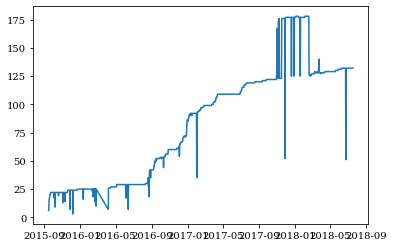

In [124]:
ct = its.groupby('as_of_date', as_index=False).count()
plt.plot(ct['as_of_date'], ct['dataset_id'])

In [125]:
dates=ct[ct.employees_on_platform>=20].as_of_date.to_list()
its_daily=its_daily[its_daily.as_of_date.isin(dates)]

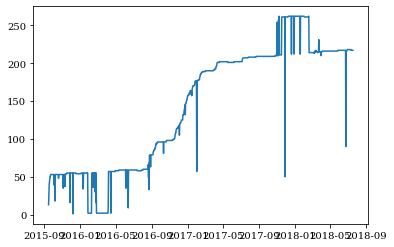

In [126]:
ct = finance.groupby('as_of_date', as_index=False).count()
plt.plot(ct['as_of_date'], ct['dataset_id'])

In [127]:
dates=ct[ct.employees_on_platform>=50].as_of_date.to_list()
fnc_daily=fnc_daily[fnc_daily.as_of_date.isin(dates)]

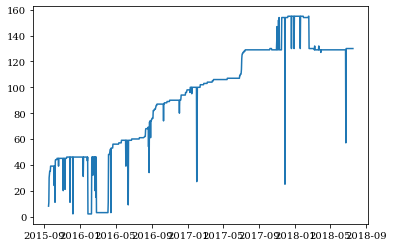

In [128]:
ct = retail.groupby('as_of_date', as_index=False).count()
plt.plot(ct['as_of_date'], ct['dataset_id'])

In [129]:
dates=ct[ct.employees_on_platform>=40].as_of_date.to_list()
rtl_daily=rtl_daily[rtl_daily.as_of_date.isin(dates)]

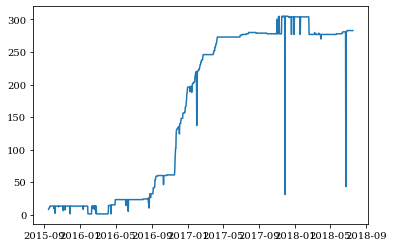

In [130]:
ct = banking.groupby('as_of_date', as_index=False).count()
plt.plot(ct['as_of_date'], ct['dataset_id'])

In [131]:
dates=ct[ct.employees_on_platform>=10].as_of_date.to_list()
bk_daily=bk_daily[bk_daily.as_of_date.isin(dates)]

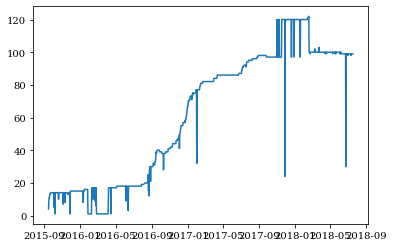

In [132]:
ct = tele.groupby('as_of_date', as_index=False).count()
plt.plot(ct['as_of_date'], ct['dataset_id'])

In [133]:
dates=ct[ct.employees_on_platform>=10].as_of_date.to_list()
tele_daily=tele_daily[tele_daily.as_of_date.isin(dates)]

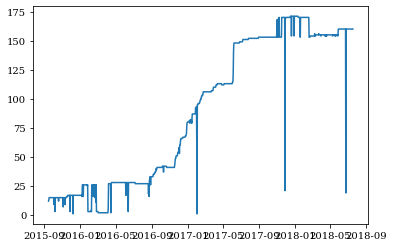

In [134]:
ct = pharm.groupby('as_of_date', as_index=False).count()
plt.plot(ct['as_of_date'], ct['dataset_id'])

In [135]:
dates=ct[ct.employees_on_platform>=10].as_of_date.to_list()
pharm_daily=pharm_daily[pharm_daily.as_of_date.isin(dates)]

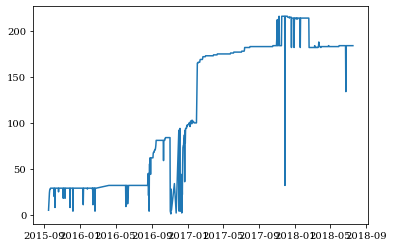

In [136]:
ct = oil.groupby('as_of_date', as_index=False).count()
plt.plot(ct['as_of_date'], ct['dataset_id'])

In [137]:
dates=ct[ct.employees_on_platform>=20].as_of_date.to_list()
oil_daily=oil_daily[oil_daily.as_of_date.isin(dates)]

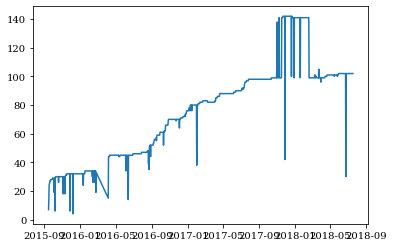

In [138]:
ct = internet.groupby('as_of_date', as_index=False).count()
plt.plot(ct['as_of_date'], ct['dataset_id'])

In [139]:
dates=ct[ct.employees_on_platform>=20].as_of_date.to_list()
itnt_daily=itnt_daily[itnt_daily.as_of_date.isin(dates)]

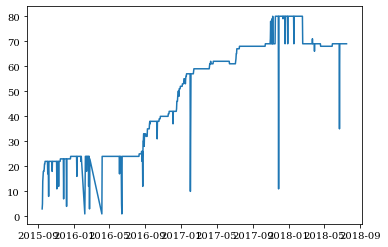

In [140]:
ct = auto.groupby('as_of_date', as_index=False).count()
plt.plot(ct['as_of_date'], ct['dataset_id'])

In [141]:
dates=ct[ct.employees_on_platform>=20].as_of_date.to_list()
auto_daily=auto_daily[auto_daily.as_of_date.isin(dates)]

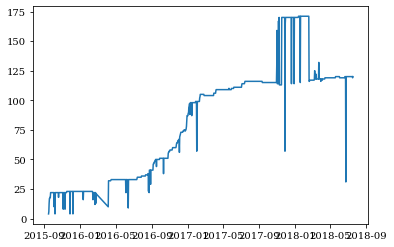

In [142]:
ct = cs.groupby('as_of_date', as_index=False).count()
plt.plot(ct['as_of_date'], ct['dataset_id'])

In [143]:
dates=ct[ct.employees_on_platform>=20].as_of_date.to_list()
cs_daily=cs_daily[cs_daily.as_of_date.isin(dates)]

In [157]:
cs_daily

,as_of_date,dataset_id,followers_count,employees (thousand),entity_id,cusip,isin,weekly_average,pct_change_employees,pct_change
7,2015-09-23,1294635,4970677,320.858,0.0,0.0,0.0,NaN,NaN,NaN
8,2015-09-24,1294635,4976560,321.204,0.0,0.0,0.0,NaN,NaN,NaN
9,2015-09-25,1294635,4981017,321.437,0.0,0.0,0.0,NaN,NaN,NaN
10,2015-09-26,1294635,4986013,321.693,0.0,0.0,0.0,NaN,NaN,NaN
11,2015-09-27,1294635,4989039,321.844,0.0,0.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
968,2018-07-13,94699295,14551999,648.800,0.0,0.0,0.0,647.686571,0.003413,0.003126
969,2018-07-14,94699295,14554325,649.788,0.0,0.0,0.0,648.135429,0.004859,0.004374
970,2018-07-15,94699295,14567078,652.744,0.0,0.0,0.0,648.958000,0.008900,0.008549
971,2018-07-16,92610498,14572304,652.870,0.0,0.0,0.0,649.790429,0.009006,0.008591


#### Calculate the rolling average (1 week) and percent change (4 weeks) of total number of employees per day

In [161]:
df_list = [its_daily, fnc_daily, rtl_daily, bk_daily, tele_daily, pharm_daily, oil_daily, itnt_daily, auto_daily, cs_daily]
for df in df_list:
    df.rename(columns={'employees_on_platform': 'employees (thousand)'}, inplace=True)
    df['employees (thousand)'] = df['employees (thousand)']/1000
    df['weekly_average'] = df['employees (thousand)'].rolling(window=7).mean()
    df['pct_change'] = df['employees (thousand)'].pct_change(periods=28)

## Exploratory data analysis


In [62]:
# slice out the dataframe of each top industry
its = top_dict['Information Technology and Services']
finance = top_dict['Financial Services']
retail = top_dict['Retail']
banking = top_dict['Banking']
tele = top_dict['Telecommunications']
pharm = top_dict['Pharmaceuticals']
oil = top_dict['Oil & Energy']
internet = top_dict['Internet']
auto = top_dict['Automotive']
cs = top_dict['Computer Software']

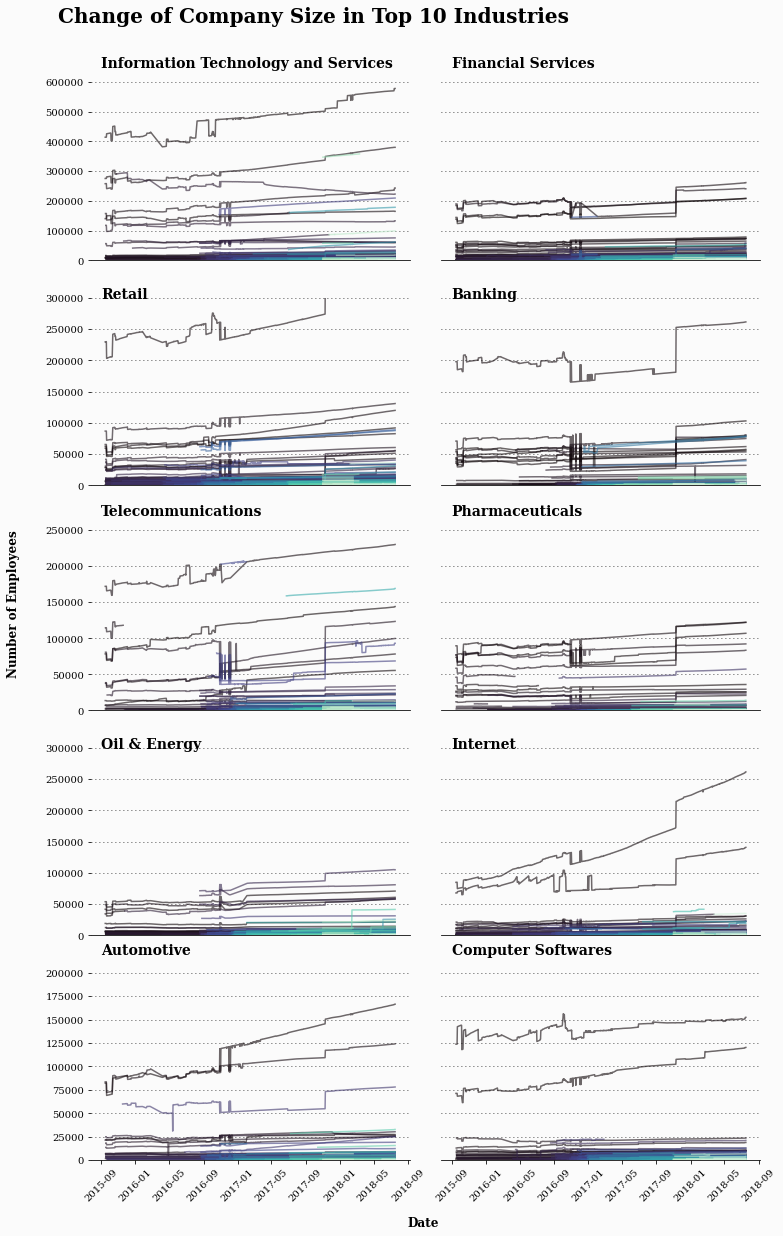

In [209]:
# initiate the figure and add gridspec
fig = plt.figure(figsize=[12, 20])
gs = fig.add_gridspec(5, 2)
gs.update(hspace=0.2, wspace=0.1)

# add ax for each plot
ax0 = fig.add_subplot(gs[0, 0], ylim = [0, 630000])
ax1 = fig.add_subplot(gs[0, 1], ylim = [0, 630000])
ax2 = fig.add_subplot(gs[1, 0], ylim = [0, 300000])
ax3 = fig.add_subplot(gs[1, 1], ylim = [0, 300000])
ax4 = fig.add_subplot(gs[2, 0], ylim = [0, 260000])
ax5 = fig.add_subplot(gs[2, 1], ylim = [0, 260000])
ax6 = fig.add_subplot(gs[3, 0], ylim = [0, 300000])
ax7 = fig.add_subplot(gs[3, 1], ylim = [0, 300000])
ax8 = fig.add_subplot(gs[4, 0], ylim = [0, 200000])
ax9 = fig.add_subplot(gs[4, 1], ylim = [0, 200000])

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]

# set the backgroud color
bg_color = '#fbfbfb'
fig.patch.set_facecolor(bg_color)
for ax in axes:
    ax.set_facecolor(bg_color)

# invisualize the top and right spines of plot
for s in ['top', 'left', 'right']:
    for ax in axes:
        ax.spines[s].set_visible(False)

# generate the lineplot
sns.lineplot(ax=ax0, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=its, 
             legend=False, alpha=.6, palette='mako')
sns.lineplot(ax=ax1, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=finance,
             legend=False, alpha=.6, palette='mako')
sns.lineplot(ax=ax2, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=retail,
             legend=False, alpha=.6, palette='mako')
sns.lineplot(ax=ax3, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=banking,
             legend=False, alpha=.6, palette='mako')
sns.lineplot(ax=ax4, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=tele,
             legend=False, alpha=.6, palette='mako')
sns.lineplot(ax=ax5, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=pharm,
             legend=False, alpha=.6, palette='mako')
sns.lineplot(ax=ax6, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=oil,
             legend=False, alpha=.6, palette='mako')
sns.lineplot(ax=ax7, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=internet,
             legend=False, alpha=.6, palette='mako')
sns.lineplot(ax=ax8, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=auto,
             legend=False, alpha=.6, palette='mako')
sns.lineplot(ax=ax9, zorder=3,
             x='as_of_date', y='employees_on_platform', hue='company_name', data=cs,
             legend=False, alpha=.6, palette='mako')

for ax in axes:
    ax.grid(color='black', linestyle=':', axis='y', zorder=0, dashes=(1, 4))


ax0.text(Timestamp('2015-09-01'), 650000, 'Information Technology and Services', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax1.text(Timestamp('2015-09-01'), 650000, 'Financial Services', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax2.text(Timestamp('2015-09-01'), 300000, 'Retail', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax3.text(Timestamp('2015-09-01'), 300000, 'Banking', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax4.text(Timestamp('2015-09-01'), 270000, 'Telecommunications', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax5.text(Timestamp('2015-09-01'), 270000, 'Pharmaceuticals', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax6.text(Timestamp('2015-09-01'), 300000, 'Oil & Energy', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax7.text(Timestamp('2015-09-01'), 300000, 'Internet', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax8.text(Timestamp('2015-09-01'), 220000, 'Automotive', 
         fontsize=14, fontweight='bold', fontfamily='serif')
ax9.text(Timestamp('2015-09-01'), 220000, 'Computer Softwares', 
         fontsize=14, fontweight='bold', fontfamily='serif')

ax0.text(Timestamp('2015-04-01'), 800000,
         'Change of Company Size in Top 10 Industries',
        fontsize=20, fontweight='bold', fontfamily='serif')
ax8.text(Timestamp('2018-09-01'), -70000,
         'Date',
         fontsize=12, fontweight='bold')

for ax in axes:
    ax.set_xlabel(None)
    ax.set_ylabel(None)
ax4.text(Timestamp('2014-10-01'), 50000,
         'Number of Employees',
         fontsize=12, fontweight='bold', rotation =90)

left_axes = [ax0, ax2, ax4, ax6, ax8]
for ax in left_axes:
    for ytick in ax.get_yticklabels():
        ytick.set_fontsize(10)
        
ax0.set_xticklabels('')
ax0.tick_params(bottom=False)

ax1.set_xticklabels('')
ax1.set_yticklabels('')
ax1.tick_params(left=False)
ax1.tick_params(bottom=False)

ax2.set_xticklabels('')
ax2.tick_params(bottom=False)

ax3.set_xticklabels('')
ax3.set_yticklabels('')
ax3.tick_params(left=False)
ax3.tick_params(bottom=False)

ax4.set_xticklabels('')
ax4.tick_params(bottom=False)

ax5.set_xticklabels('')
ax5.set_yticklabels('')
ax5.tick_params(left=False)
ax5.tick_params(bottom=False)

ax6.set_xticklabels('')
ax6.tick_params(bottom=False)

ax7.set_xticklabels('')
ax7.set_yticklabels('')
ax7.tick_params(left=False)
ax7.tick_params(bottom=False)

ax9.set_yticklabels('')
ax9.tick_params(left=False)

bottom_axes = [ax8, ax9]
for ax in bottom_axes:
    for xtick in ax.get_xticklabels():
        xtick.set_rotation(45);

**This is the change of employee number in each companies over around three years.**

I selected the top 10 industries, those have the 10 largest companies. 

There are fluctuations in company size. Most of them are in the trend of expansion.

**Next, I'll compare the average size of representative companies in these industries.**

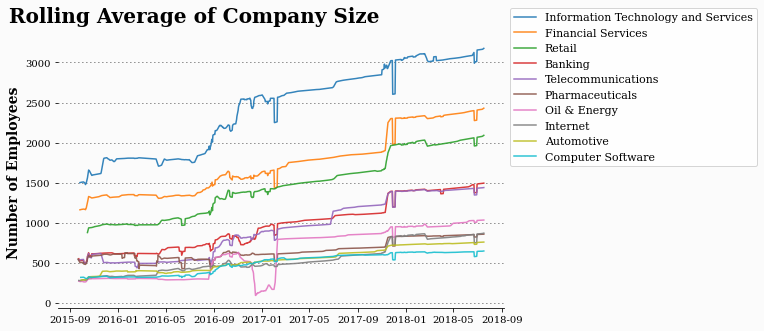

In [159]:
# initiate the figure and add gridspec
fig = plt.figure(figsize=[8, 5])
gs = fig.add_gridspec(1, 1)
gs.update(hspace=0.1, wspace=0.05)
ax0 = fig.add_subplot(gs[0, 0])

bg_color = '#fbfbfb'
fig.patch.set_facecolor(bg_color)
ax0.set_facecolor(bg_color)


ax0.grid(color='black', linestyle=':', axis='y', zorder=0, dashes=(1, 4))


sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='weekly_average', data=its_daily, 
             label = 'Information Technology and Services')
sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='weekly_average', data=fnc_daily,
             label = 'Financial Services')
sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='weekly_average', data=rtl_daily,
             label = 'Retail')
sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='weekly_average', data=bk_daily,
             label = 'Banking')
sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='weekly_average', data=tele_daily,
             label = 'Telecommunications')
sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='weekly_average', data=pharm_daily,
             label = 'Pharmaceuticals')
sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='weekly_average', data=oil_daily,
             label = 'Oil & Energy')
sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='weekly_average', data=itnt_daily,
             label = 'Internet')
sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='weekly_average', data=auto_daily,
             label = 'Automotive')
sns.lineplot(ax=ax0, zorder=3, alpha=.9,
             x='as_of_date', y='weekly_average', data=cs_daily,
             label = 'Computer Software')

ax0.text(Timestamp('2015-04-01'), 3500, 
         'Rolling Average of Company Size',
         fontsize=20, fontweight='bold')

ax0.legend(loc=3, bbox_to_anchor=(1, 0.5), fontsize=11)

for s in ['top', 'left', 'right']:
    ax0.spines[s].set_visible(False)
    
ax0.set_xlabel(None)
ax0.set_ylabel('Number of Employees', fontsize=14, fontweight='bold');

**This is the rolling average of employee number in 10 most largest companies in each of the top 10 industries.**

"Information Technology and Services" is conspicuous by its stable expansion and large size.

"Consumer Electronics" showed a slightly shrink.

Other industries showed expansion, especially during the winter of 2017, there is a sudden increase.

**Next, I'll compare the average fluctuation of company size of these industries.**

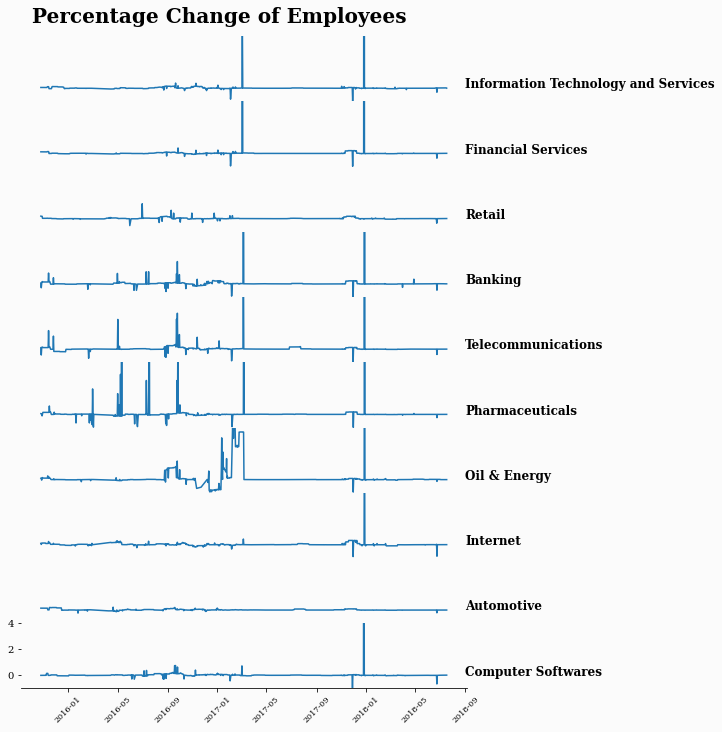

In [169]:
# initiate the figure and add gridspec
fig = plt.figure(figsize=[8, 12])
gs = fig.add_gridspec(10, 1)
gs.update(hspace=0, wspace=1)
ax0 = fig.add_subplot(gs[0, 0], ylim=[-1, 4])
ax1 = fig.add_subplot(gs[1, 0], ylim=[-1, 4])
ax2 = fig.add_subplot(gs[2, 0], ylim=[-1, 4])
ax3 = fig.add_subplot(gs[3, 0], ylim=[-1, 4])
ax4 = fig.add_subplot(gs[4, 0], ylim=[-1, 4])
ax5 = fig.add_subplot(gs[5, 0], ylim=[-1, 4])
ax6 = fig.add_subplot(gs[6, 0], ylim=[-1, 4])
ax7 = fig.add_subplot(gs[7, 0], ylim=[-1, 4])
ax8 = fig.add_subplot(gs[8, 0], ylim=[-1, 4])
ax9 = fig.add_subplot(gs[9, 0], ylim=[-1, 4])

axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9]
upper_axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

bg_color = '#fbfbfb'
fig.patch.set_facecolor(bg_color)
for ax in axes:
    ax.set_facecolor(bg_color)

#ax0.grid(color='black', linestyle=':', axis='y', zorder=0, dashes=(1, 4))


sns.lineplot(ax=ax0, zorder=3,
             x='as_of_date', y='pct_change', data=its_daily)
sns.lineplot(ax=ax1, zorder=4,
             x='as_of_date', y='pct_change', data=fnc_daily)
sns.lineplot(ax=ax2, zorder=5,
             x='as_of_date', y='pct_change', data=rtl_daily)
sns.lineplot(ax=ax3, zorder=6,
             x='as_of_date', y='pct_change', data=bk_daily)
sns.lineplot(ax=ax4, zorder=7,
             x='as_of_date', y='pct_change', data=tele_daily)
sns.lineplot(ax=ax5, zorder=8,
             x='as_of_date', y='pct_change', data=pharm_daily)
sns.lineplot(ax=ax6, zorder=9,
             x='as_of_date', y='pct_change', data=oil_daily)
sns.lineplot(ax=ax7, zorder=10,
             x='as_of_date', y='pct_change', data=itnt_daily)
sns.lineplot(ax=ax8, zorder=11,
             x='as_of_date', y='pct_change', data=auto_daily)
sns.lineplot(ax=ax9, zorder=12,
             x='as_of_date', y='pct_change', data=cs_daily)

ax0.text(Timestamp('2015-10-01'), 5, 
         'Percentage Change of Company size',
         fontsize=20, fontweight='bold')

ax0.text(Timestamp('2018-09-01'), 0, 'Information Technology and Services',
         fontsize=12, fontweight='bold')
ax1.text(Timestamp('2018-09-01'), 0, 'Financial Services',
         fontsize=12, fontweight='bold')
ax2.text(Timestamp('2018-09-01'), 0, 'Retail',
         fontsize=12, fontweight='bold')
ax3.text(Timestamp('2018-09-01'), 0, 'Banking',
         fontsize=12, fontweight='bold')
ax4.text(Timestamp('2018-09-01'), 0, 'Telecommunications',
         fontsize=12, fontweight='bold')
ax5.text(Timestamp('2018-09-01'), 0, 'Pharmaceuticals',
         fontsize=12, fontweight='bold')
ax6.text(Timestamp('2018-09-01'), 0, 'Oil & Energy',
         fontsize=12, fontweight='bold')
ax7.text(Timestamp('2018-09-01'), 0, 'Internet',
         fontsize=12, fontweight='bold')
ax8.text(Timestamp('2018-09-01'), 0, 'Automotive',
         fontsize=12, fontweight='bold')
ax9.text(Timestamp('2018-09-01'), 0, 'Computer Softwares',
         fontsize=12, fontweight='bold')

for s in ['top', 'left', 'right']:
    for ax in axes:
        ax.spines[s].set_visible(False)

ax0.set_xticklabels('')
ax0.tick_params(bottom=False)
ax0.spines['bottom'].set_visible(False)
ax1.set_xticklabels('')
ax1.tick_params(bottom=False)
ax1.spines['bottom'].set_visible(False)
ax2.set_xticklabels('')
ax2.tick_params(bottom=False)
ax2.spines['bottom'].set_visible(False)
ax3.set_xticklabels('')
ax3.tick_params(bottom=False)
ax3.spines['bottom'].set_visible(False)
ax4.set_xticklabels('')
ax4.tick_params(bottom=False)
ax4.spines['bottom'].set_visible(False)
ax5.set_xticklabels('')
ax5.tick_params(bottom=False)
ax5.spines['bottom'].set_visible(False)
ax6.set_xticklabels('')
ax6.tick_params(bottom=False)
ax6.spines['bottom'].set_visible(False)
ax7.set_xticklabels('')
ax7.tick_params(bottom=False)
ax7.spines['bottom'].set_visible(False)
ax8.set_xticklabels('')
ax8.tick_params(bottom=False)
ax8.spines['bottom'].set_visible(False)

for xtick in ax9.get_xticklabels():
        xtick.set_fontsize(8)
        xtick.set_rotation(45)

for ax in upper_axes:
    ax.set_yticklabels('')
    ax.tick_params(left=False)
for ax in axes:
    ax.set_xlabel(None)
    ax.set_ylabel(None);

**Compare the fluctuation of company size across industries, industries of retail and automotive are more stable**

**I used Density-Based Spatial Clustering of Applications with Noise (DBSCAN) to classify companies according to the change pattern of company size.**

In [170]:
company_cls = StandardScaler().fit_transform(company_cls)
db = DBSCAN(eps=0.5, min_samples=50)
db.fit(company_cls)
labels = db.labels_
cluster = pd.DataFrame(labels, columns=['cluster'])
company_af_cls = company.join(cluster)
company_af_cls['industry'] = company_af_cls['industry'].astype('category')
company_af_cls

,company_name,count,mean,median,min,max,std,cv,change,industry,cluster
0,3M Electronic Monitoring Ltd.,93,1024.075269,1024.0,1024,1028,0.515764,0.000504,-0.003906,Information Technology and Services,0
1,51job,93,2155.892473,2156.0,2147,2156,0.937879,0.000435,0.004175,Information Technology and Services,0
2,8x8,596,989.867450,959.0,780,1268,134.179088,0.135553,0.473801,Information Technology and Services,0
3,AIRSIS,92,5.000000,5.0,5,5,0.000000,0.000000,0.000000,Information Technology and Services,0
4,ARC Document Solutions,582,1355.446735,1375.0,1186,1454,70.463402,0.051985,0.147553,Information Technology and Services,0
...,...,...,...,...,...,...,...,...,...,...,...
1998,USA Auto Parts,93,6.000000,6.0,6,6,0.000000,0.000000,0.000000,Automotive,0
1999,Visteon Corporation,376,8511.593085,8720.0,7954,8934,338.382193,0.039755,0.115137,Automotive,0
2000,WABCO,948,3771.891350,3887.0,2738,4861,609.877637,0.161690,0.562848,Automotive,0
2001,Westport Fuel Systems,569,392.753954,396.0,371,466,10.483854,0.026693,0.035646,Automotive,0


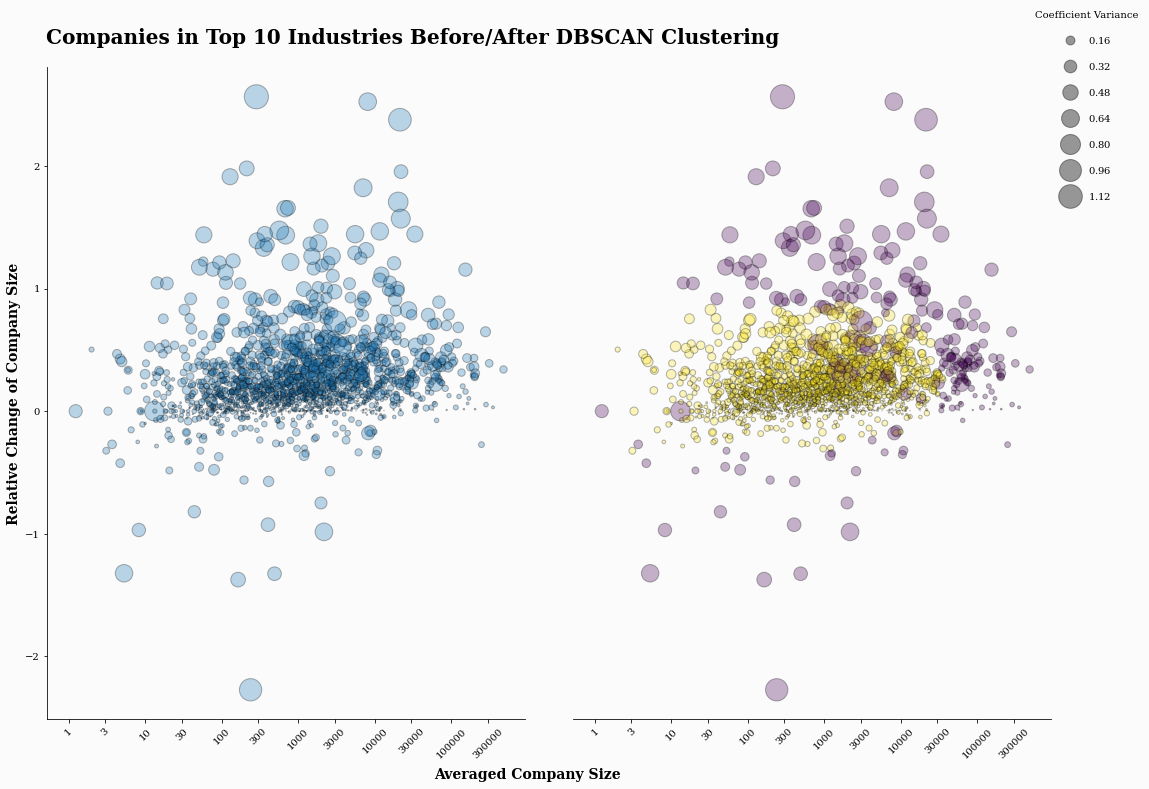

In [171]:
fig = plt.figure(figsize=[18, 12])
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.1)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

bg_color = '#fbfbfb'
fig.patch.set_facecolor(bg_color)
ax0.set_facecolor(bg_color)
ax1.set_facecolor(bg_color)

for s in ['top', 'right']:
    ax0.spines[s].set_visible(False)
    ax1.spines[s].set_visible(False)
ax1.spines['left'].set_visible(False)

cmap = sns.color_palette("vlag", as_cmap=True)

ax0.scatter(company['mean'], company['change'], s=company['cv']*500, 
            alpha=.3, edgecolors='black')

scatter = ax1.scatter(company_af_cls['mean'], company_af_cls['change'], s = company_af_cls['cv']*500,
            c = company_af_cls['cluster'],
            alpha=.3, edgecolors='black')

ax0.text(0.5, 3.0,
         'Companies in Top 10 Industries Before/After DBSCAN Clustering',
         fontsize=20, fontweight='bold')


ax0.text(60000, -3, 
         'Averaged Company Size',
         fontsize=14, fontweight='bold')
ax0.set_ylabel('Relative Change of Company Size',
               fontsize=14, fontweight='bold')

ax0.set_xscale('log')
ax1.set_xscale('log')
xtick = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000]
ax0.set_xticks(xtick)
ax1.set_xticks(xtick)
ax0.set_xticklabels(xtick, rotation=45)
ax1.set_xticklabels(xtick, rotation=45)
ax1.set_yticklabels('')
ax0.minorticks_off()
ax1.minorticks_off()
ax1.tick_params(left=False)

handles, labels = scatter.legend_elements(prop="sizes", alpha=0.4)
labels = ['$\\mathdefault{0.16}$',
 '$\\mathdefault{0.32}$',
 '$\\mathdefault{0.48}$',
 '$\\mathdefault{0.64}$',
 '$\\mathdefault{0.80}$',
 '$\\mathdefault{0.96}$',
 '$\\mathdefault{1.12}$']
legend2 = ax1.legend(handles, labels, 
                     loc="upper right", bbox_to_anchor=[1, 1, 0.2, 0.1],
                     title="Coefficient Variance", labelspacing=1.5, fontsize=10, 
                     edgecolor=bg_color, facecolor=bg_color);

**Distribution of companies in popular industries**
each data dot represents one company:
- *x-axis: averaged company size in three years*
- *y-axis: relative change of company size: (last day-first day)/mean*
- *size: coefficient variance of company size*
- *color: cluster result of DBSCAN*

The DBSCAN model identified one cluster of companies (yellow). They have small change in company size and small overall fluctuation. Thus, I would like to classify these companies into two groups: 
> Cluster I: companies with stable development (yellow)

> Cluster II: companies shrinking or expanding with high fluctuation (purple). 

Next, I'll select some companies showing aggressive expansion and explore the relationship between their company size and stock price, to figure out whether their expansion strategy was reflected on the stock market.

In [174]:
cluster_I = company_af_cls.query('cluster == 0').copy()
cluster_II = company_af_cls.query('cluster == -1').copy()

In [277]:
cluster_II.sort_values(by='change', ascending=False)

,company_name,count,mean,median,min,max,std,cv,change,industry,cluster
412,Blucora,787,283.785260,68.0,51,781,330.528320,1.164713,2.565320,Financial Services,-1
1812,McDermott International Inc.,572,8090.673077,6738.5,5169,25608,5056.837114,0.625021,2.525377,Oil & Energy,-1
538,Marsh & McLennan Companies,869,21330.983890,8054.0,6367,57264,21970.915662,1.030000,2.377996,Financial Services,-1
436,CoBiz Financial Inc.,334,212.032934,191.0,176,598,94.594926,0.446133,1.980824,Financial Services,-1
391,Aon,693,22035.324675,18586.0,15210,58309,8315.644558,0.377378,1.954407,Financial Services,-1
...,...,...,...,...,...,...,...,...,...,...,...
80,"I.D. Systems, Inc.",323,2167.600619,2820.0,97,3608,1355.648282,0.625414,-0.984960,Information Technology and Services,-1
51,DevX,653,5.290965,3.0,1,10,3.245269,0.613361,-1.323010,Information Technology and Services,-1
1038,"Demandware, a Salesforce company",726,489.962810,429.0,312,974,183.624610,0.374773,-1.326631,Internet,-1
166,Textura Corporation,660,163.680303,139.0,96,333,70.965438,0.433561,-1.374631,Information Technology and Services,-1


In [283]:
blucora = df.query('company_name=="Blucora"').copy()[['as_of_date', 'company_name', 'employees_on_platform']]
blucora.rename(columns={'as_of_date': 'Date'}, inplace=True)
blucora

,Date,company_name,employees_on_platform
29861,2015-11-13,Blucora,63
30422,2015-11-14,Blucora,63
30984,2015-11-15,Blucora,63
31548,2015-11-16,Blucora,63
32110,2015-11-17,Blucora,63
...,...,...,...
2407669,2018-07-13,Blucora,779
2412048,2018-07-14,Blucora,779
2417841,2018-07-15,Blucora,779
2419523,2018-07-16,Blucora,779


In [216]:
Adamas = df[df['company_name']=='Adamas Pharmaceuticals, Inc.'].copy()[['as_of_date', 'company_name', 'employees_on_platform']]
Adamas.rename(columns={'as_of_date': 'Date'}, inplace=True)
Adamas

,Date,company_name,employees_on_platform
349935,2016-11-29,"Adamas Pharmaceuticals, Inc.",77
351723,2016-11-30,"Adamas Pharmaceuticals, Inc.",77
353511,2016-12-01,"Adamas Pharmaceuticals, Inc.",77
355297,2016-12-02,"Adamas Pharmaceuticals, Inc.",74
357111,2016-12-03,"Adamas Pharmaceuticals, Inc.",74
...,...,...,...
2408086,2018-07-13,"Adamas Pharmaceuticals, Inc.",159
2414611,2018-07-14,"Adamas Pharmaceuticals, Inc.",159
2418032,2018-07-15,"Adamas Pharmaceuticals, Inc.",159
2422335,2018-07-16,"Adamas Pharmaceuticals, Inc.",159


In [224]:
tjmaxx=df.query('company_name=="TJ Maxx"').copy()[['as_of_date', 'company_name', 'employees_on_platform']]
tjmaxx.rename(columns={'as_of_date': 'Date'}, inplace=True)
tjmaxx

,Date,company_name,employees_on_platform
19,2015-09-16,TJ Maxx,7021
168,2015-09-17,TJ Maxx,7024
424,2015-09-18,TJ Maxx,7031
803,2015-09-19,TJ Maxx,7034
1225,2015-09-20,TJ Maxx,7038
...,...,...,...
2410895,2018-07-13,TJ Maxx,12897
2412247,2018-07-14,TJ Maxx,12896
2416367,2018-07-15,TJ Maxx,12902
2421565,2018-07-16,TJ Maxx,12912


In [237]:
ohi = df.query('company_name=="Omega Healthcare Investors"').copy()[['as_of_date', 'company_name', 'employees_on_platform']]
ohi.rename(columns={'as_of_date': 'Date'}, inplace=True)
ohi

,Date,company_name,employees_on_platform
999,2015-09-19,Omega Healthcare Investors,24
1421,2015-09-20,Omega Healthcare Investors,24
1892,2015-09-21,Omega Healthcare Investors,34
2392,2015-09-22,Omega Healthcare Investors,34
2906,2015-09-23,Omega Healthcare Investors,34
...,...,...,...
2409923,2018-07-13,Omega Healthcare Investors,47
2412373,2018-07-14,Omega Healthcare Investors,47
2415001,2018-07-15,Omega Healthcare Investors,47
2421505,2018-07-16,Omega Healthcare Investors,47


In [264]:
ibm = df.query('company_name=="IBM"').copy()[['as_of_date', 'company_name', 'employees_on_platform']]
ibm.rename(columns={'as_of_date': 'Date'}, inplace=True)
ibm

,Date,company_name,employees_on_platform
8,2015-09-16,IBM,414139
122,2015-09-17,IBM,414181
329,2015-09-18,IBM,414269
708,2015-09-19,IBM,414329
1131,2015-09-20,IBM,414397
...,...,...,...
2408030,2018-07-13,IBM,570301
2411486,2018-07-14,IBM,577788
2416070,2018-07-15,IBM,577837
2420525,2018-07-16,IBM,577898


1. Adamas Pharmaceuticals, Inc. in cluster I

high cv

In [190]:
# get the stock ticker symbols
url="https://pkgstore.datahub.io/core/nasdaq-listings/nasdaq-listed_csv/data/7665719fb51081ba0bd834fde71ce822/nasdaq-listed_csv.csv"
s = requests.get(url).content
companies = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [198]:
# set the date range
start = datetime.datetime(2016, 11, 29)
end = datetime.datetime(2018, 7, 17)

# download the stock price
try:
    stock = []
    stock = yf.download('ADMS', start = start, end = end, progress=False)
    if len(stock) == 0:
        None
    else:
        stock['Name'] = 'ADMS'
except Exception:
    None

stock = pd.DataFrame(stock)

In [217]:
stock = stock.reset_index()
stock

,index,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,0,2016-11-29,15.110000,15.580000,14.940000,15.150000,15.150000,123000,ADMS
1,1,2016-11-30,15.200000,15.550000,14.860000,15.000000,15.000000,98700,ADMS
2,2,2016-12-01,15.090000,15.245000,14.310000,14.550000,14.550000,175900,ADMS
3,3,2016-12-02,14.550000,15.940000,14.500000,15.530000,15.530000,123600,ADMS
4,4,2016-12-05,15.670000,15.950000,15.150000,15.540000,15.540000,166700,ADMS
...,...,...,...,...,...,...,...,...,...
404,404,2018-07-10,25.799999,25.799999,25.110001,25.450001,25.450001,268500,ADMS
405,405,2018-07-11,25.219999,25.629999,24.830000,25.139999,25.139999,272600,ADMS
406,406,2018-07-12,25.400000,26.340000,24.990000,26.340000,26.340000,450600,ADMS
407,407,2018-07-13,26.250000,27.559999,25.860001,27.059999,27.059999,522100,ADMS


In [218]:
Adamas = pd.merge(left=Adamas, right=stock, how='inner', on='Date')
Adamas

,Date,company_name,employees_on_platform,index,Open,High,Low,Close,Adj Close,Volume,Name
0,2016-11-29,"Adamas Pharmaceuticals, Inc.",77,0,15.110000,15.580000,14.940000,15.150000,15.150000,123000,ADMS
1,2016-11-30,"Adamas Pharmaceuticals, Inc.",77,1,15.200000,15.550000,14.860000,15.000000,15.000000,98700,ADMS
2,2016-12-01,"Adamas Pharmaceuticals, Inc.",77,2,15.090000,15.245000,14.310000,14.550000,14.550000,175900,ADMS
3,2016-12-02,"Adamas Pharmaceuticals, Inc.",74,3,14.550000,15.940000,14.500000,15.530000,15.530000,123600,ADMS
4,2016-12-05,"Adamas Pharmaceuticals, Inc.",74,4,15.670000,15.950000,15.150000,15.540000,15.540000,166700,ADMS
...,...,...,...,...,...,...,...,...,...,...,...
401,2018-07-10,"Adamas Pharmaceuticals, Inc.",159,404,25.799999,25.799999,25.110001,25.450001,25.450001,268500,ADMS
402,2018-07-11,"Adamas Pharmaceuticals, Inc.",159,405,25.219999,25.629999,24.830000,25.139999,25.139999,272600,ADMS
403,2018-07-12,"Adamas Pharmaceuticals, Inc.",159,406,25.400000,26.340000,24.990000,26.340000,26.340000,450600,ADMS
404,2018-07-13,"Adamas Pharmaceuticals, Inc.",159,407,26.250000,27.559999,25.860001,27.059999,27.059999,522100,ADMS


In [221]:
X=Adamas[['Close', 'Open']]
y=Adamas['employees_on_platform']

X_train, X_test, y_train, y_test = train_test_split(X, y)
reg = LinearRegression().fit(X, y)

In [222]:
reg.score(X, y)

0.5350816972266383

2. TJ Maxx in cluster I

the most records

In [232]:
# set the date range
start = datetime.datetime(2015, 9, 16)
end = datetime.datetime(2018, 7, 17)

# download the stock price
try:
    stock = []
    stock = yf.download('TJX', start = start, end = end, progress=False)
    if len(stock) == 0:
        None
    else:
        stock['Name'] = 'TJX'
except Exception:
    None

stock = pd.DataFrame(stock)

In [234]:
stock = stock.reset_index()
tjmaxx = pd.merge(tjmaxx, stock, how='inner', on='Date')
tjmaxx

,Date,company_name,employees_on_platform,Open,High,Low,Close,Adj Close,Volume,Name
0,2015-09-16,TJ Maxx,7021,35.459999,35.830002,35.160000,35.785000,33.398235,5727000,TJX
1,2015-09-17,TJ Maxx,7024,36.200001,36.744999,36.029999,36.270000,33.850880,9501000,TJX
2,2015-09-18,TJ Maxx,7031,35.930000,36.130001,35.555000,35.680000,33.300243,9746000,TJX
3,2015-09-21,TJ Maxx,7077,35.849998,36.150002,35.730000,35.985001,33.584900,4032800,TJX
4,2015-09-22,TJ Maxx,7094,35.650002,35.724998,35.275002,35.610001,33.234913,6276600,TJX
...,...,...,...,...,...,...,...,...,...,...
698,2018-07-10,TJ Maxx,12875,47.764999,47.799999,47.185001,47.514999,46.214355,9527800,TJX
699,2018-07-11,TJ Maxx,12890,47.275002,47.880001,47.255001,47.680000,46.374844,5032000,TJX
700,2018-07-12,TJ Maxx,12889,47.514999,47.680000,47.095001,47.125000,45.835037,8791800,TJX
701,2018-07-13,TJ Maxx,12897,47.139999,47.689999,47.095001,47.665001,46.360252,4376000,TJX


In [235]:
X=tjmaxx[['Close', 'Open']]
y=tjmaxx['employees_on_platform']

X_train, X_test, y_train, y_test = train_test_split(X, y)
reg = LinearRegression().fit(X, y)

In [236]:
reg.score(X, y)

0.2365960881467266

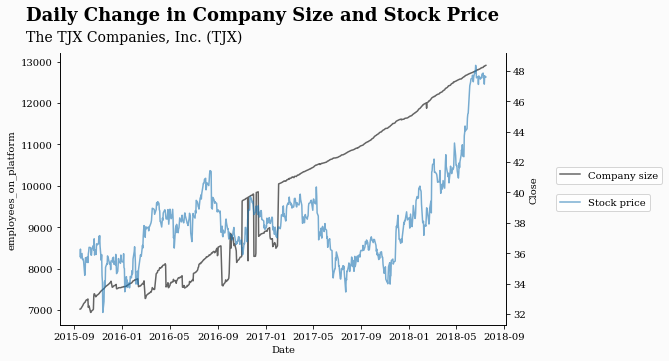

In [261]:
fig = plt.figure(figsize=[8, 5])
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = ax0.twinx()

bg_color = '#fbfbfb'
fig.patch.set_facecolor(bg_color)
ax0.set_facecolor(bg_color)
ax1.set_facecolor(bg_color)

sns.lineplot(ax=ax0, color='black', alpha=.6,
             x='Date', y='employees_on_platform', data=tjmaxx,
             label='Company size')
sns.lineplot(ax=ax1, alpha=.6,
             x='Date', y='Close', data=tjmaxx,
             label='Stock price')

ax0.spines['top'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax0.legend(loc=3, bbox_to_anchor=(1.1, 0.5))
ax1.legend(loc=3, bbox_to_anchor=(1.1, 0.4))

ax0.text(Timestamp('2015-05-01'), 14000,
         'Daily Change in Company Size and Stock Price',
         fontsize=18, fontweight='bold')
ax0.text(Timestamp('2015-05-01'), 13500,
         'The TJX Companies, Inc. (TJX)',
         fontsize=14);

3. Omega Healthcare Investors in cluster I

high cv

In [239]:
# set the date range
start = datetime.datetime(2015, 9, 19)
end = datetime.datetime(2018, 7, 17)

# download the stock price
try:
    stock = []
    stock = yf.download('OHI', start = start, end = end, progress=False)
    if len(stock) == 0:
        None
    else:
        stock['Name'] = 'OHI'
except Exception:
    None

stock = pd.DataFrame(stock)

In [238]:
stock = stock.reset_index()
ohi = pd.merge(ohi, stock, how='inner', on='Date')
ohi

,Date,company_name,employees_on_platform,index,Open,High,Low,Close,Adj Close,Volume,Name
0,2015-09-21,Omega Healthcare Investors,34,3,35.849998,36.150002,35.730000,35.985001,33.584900,4032800,TJX
1,2015-09-22,Omega Healthcare Investors,34,4,35.650002,35.724998,35.275002,35.610001,33.234913,6276600,TJX
2,2015-09-23,Omega Healthcare Investors,34,5,35.575001,35.790001,35.435001,35.580002,33.206913,3492200,TJX
3,2015-09-24,Omega Healthcare Investors,34,6,35.200001,35.770000,35.185001,35.615002,33.239571,4159800,TJX
4,2015-09-25,Omega Healthcare Investors,34,7,35.900002,35.950001,35.224998,35.480000,33.113583,5210200,TJX
...,...,...,...,...,...,...,...,...,...,...,...
695,2018-07-10,Omega Healthcare Investors,47,708,47.764999,47.799999,47.185001,47.514999,46.214355,9527800,TJX
696,2018-07-11,Omega Healthcare Investors,47,709,47.275002,47.880001,47.255001,47.680000,46.374844,5032000,TJX
697,2018-07-12,Omega Healthcare Investors,47,710,47.514999,47.680000,47.095001,47.125000,45.835037,8791800,TJX
698,2018-07-13,Omega Healthcare Investors,47,711,47.139999,47.689999,47.095001,47.665001,46.360252,4376000,TJX


In [240]:
X=ohi[['Close', 'Open']]
y=ohi['employees_on_platform']

X_train, X_test, y_train, y_test = train_test_split(X, y)
reg = LinearRegression().fit(X, y)

In [241]:
reg.score(X, y)

0.2560363985000723

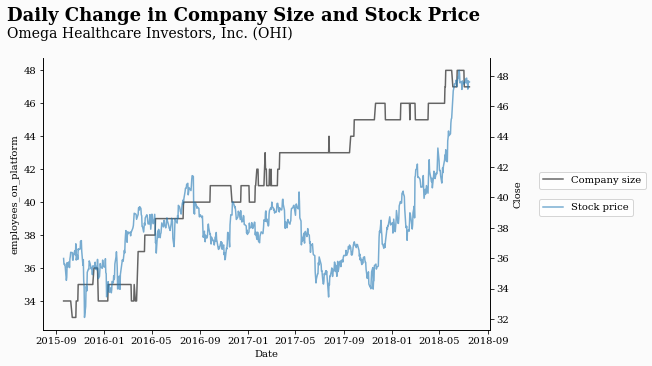

In [282]:
fig = plt.figure(figsize=[8, 5])
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = ax0.twinx()

bg_color = '#fbfbfb'
fig.patch.set_facecolor(bg_color)
ax0.set_facecolor(bg_color)
ax1.set_facecolor(bg_color)

sns.lineplot(ax=ax0, color='black', alpha=.6,
             x='Date', y='employees_on_platform', data=ohi,
             label='Company size')
sns.lineplot(ax=ax1, alpha=.6,
             x='Date', y='Close', data=ohi,
             label='Stock price')

ax0.spines['top'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax0.legend(loc=3, bbox_to_anchor=(1.1, 0.5))
ax1.legend(loc=3, bbox_to_anchor=(1.1, 0.4))

ax0.text(Timestamp('2015-05-01'), 51,
         'Daily Change in Company Size and Stock Price',
         fontsize=18, fontweight='bold')
ax0.text(Timestamp('2015-05-01'), 50,
         'Omega Healthcare Investors, Inc. (OHI)',
         fontsize=14);

4. IBM in cluster II

In [265]:
# set the date range
start = datetime.datetime(2015, 9, 16)
end = datetime.datetime(2018, 7, 17)

# download the stock price
try:
    stock = []
    stock = yf.download('IBM', start = start, end = end, progress=False)
    if len(stock) == 0:
        None
    else:
        stock['Name'] = 'IBM'
except Exception:
    None

stock = pd.DataFrame(stock)
stock.reset_index(inplace=True)

In [266]:
ibm = pd.merge(ibm, stock, how='inner', on='Date')
ibm

,Date,company_name,employees_on_platform,Open,High,Low,Close,Adj Close,Volume,Name
0,2015-09-16,IBM,414139,147.839996,148.889999,147.539993,148.410004,118.272308,2799200,IBM
1,2015-09-17,IBM,414181,148.100006,149.679993,147.300003,148.139999,118.057137,4003000,IBM
2,2015-09-18,IBM,414269,146.050003,146.389999,143.979996,144.509995,115.164268,7975800,IBM
3,2015-09-21,IBM,425762,145.389999,146.979996,144.919998,146.479996,116.734222,3825000,IBM
4,2015-09-22,IBM,425903,144.619995,145.059998,143.770004,144.429993,115.100525,3564100,IBM
...,...,...,...,...,...,...,...,...,...,...
698,2018-07-10,IBM,569954,144.509995,145.589996,144.259995,144.710007,128.171249,3777000,IBM
699,2018-07-11,IBM,570092,144.000000,146.190002,144.000000,144.940002,128.374954,3526600,IBM
700,2018-07-12,IBM,570196,145.850006,146.830002,145.740005,146.449997,129.712387,3119500,IBM
701,2018-07-13,IBM,570301,146.449997,146.979996,145.800003,145.899994,129.225220,3062600,IBM


In [271]:
x = ibm['Close'].to_numpy()
x = x.reshape(-1,1)
y=ibm['employees_on_platform']

reg = LinearRegression().fit(x, y)

In [272]:
reg.score(x, y)

0.03894239510758135

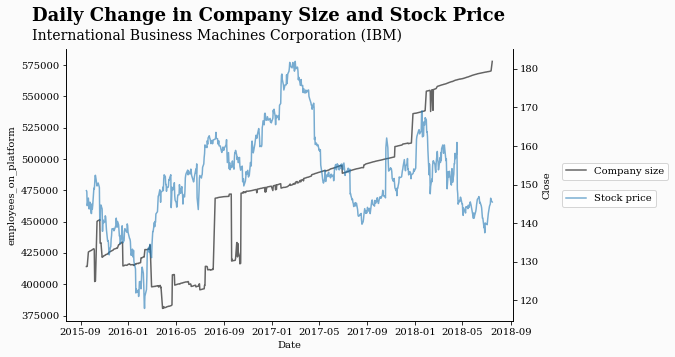

In [276]:
fig = plt.figure(figsize=[8, 5])
gs = fig.add_gridspec(1, 1)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = ax0.twinx()

bg_color = '#fbfbfb'
fig.patch.set_facecolor(bg_color)
ax0.set_facecolor(bg_color)
ax1.set_facecolor(bg_color)

sns.lineplot(ax=ax0, color='black', alpha=.6,
             x='Date', y='employees_on_platform', data=ibm,
             label='Company size')
sns.lineplot(ax=ax1, alpha=.6,
             x='Date', y='Close', data=ibm,
             label='Stock price')

ax0.spines['top'].set_visible(False)
ax1.spines['top'].set_visible(False)

ax0.legend(loc=3, bbox_to_anchor=(1.1, 0.5))
ax1.legend(loc=3, bbox_to_anchor=(1.1, 0.4))

ax0.text(Timestamp('2015-05-01'), 610000,
         'Daily Change in Company Size and Stock Price',
         fontsize=18, fontweight='bold')
ax0.text(Timestamp('2015-05-01'), 595000,
         'International Business Machines Corporation (IBM)',
         fontsize=14);

## Conclusion

1. In this dataset, most companies are expanding from 2015 to 2018;
2. Based on the extent of expansion and fluctuation in company size, these companies could be clustered into three categories:
- Stable expansion: Variance of the size change is small. Slow expansion in three years.
- Rapid expansion: Variance is usually larger. Over 0.5 relative increase in company size.
- Shrinkage: Relative change in company size is negative. Variance is large.
3. Overall, industries of retail and automotive are relatively more stable than other industries.